In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim
import requests

In [2]:
df = pd.read_csv('canada_lat_long.csv')
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


## PLOTTING ALL NEIGHBOURHOODS ON THE TORONTO MAP

In [3]:
toronto_coords = [43.780918, -79.421371]  #obtained from Google

map_toronto = folium.Map(location = toronto_coords, zoom_start = 10)

for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.4,
        parse_html=False).add_to(map_toronto)
    
map_toronto

## EXPLORING THE NEIGHBOURHOODS USING FOURSQUARE API

In [4]:
CLIENT_ID = 'IGTQLCEE2D1OT02PHFTIRACTFISGM1RN3ECBKIHYHVX52TZE' # your Foursquare ID
CLIENT_SECRET = '33TC3SRDLVIEBRQX1DZUFDJCFZ5DMUZXTSIYST4ISK0HU5QV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500

In [5]:
venues = []

for name, lat, lng in zip(df['Neighborhood'], df['Latitude'], df['Longitude']):
    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
venues

[[('Parkwoods',
   43.7532586,
   -79.3296565,
   'Brookbanks Park',
   43.751976046055574,
   -79.33214044722958,
   'Park'),
  ('Parkwoods',
   43.7532586,
   -79.3296565,
   'Variety Store',
   43.75197441585782,
   -79.33311418516017,
   'Food & Drink Shop')],
 [('Victoria Village',
   43.7258823,
   -79.31557159999998,
   'Victoria Village Arena',
   43.72348055545508,
   -79.31563520925143,
   'Hockey Arena'),
  ('Victoria Village',
   43.7258823,
   -79.31557159999998,
   'Portugril',
   43.72581876267242,
   -79.31278541470671,
   'Portuguese Restaurant'),
  ('Victoria Village',
   43.7258823,
   -79.31557159999998,
   'Tim Hortons',
   43.725516631714754,
   -79.31310251366091,
   'Coffee Shop'),
  ('Victoria Village',
   43.7258823,
   -79.31557159999998,
   'The Frig',
   43.72705130603407,
   -79.31741760908679,
   'French Restaurant'),
  ('Victoria Village',
   43.7258823,
   -79.31557159999998,
   'Eglinton Ave E & Sloane Ave/Bermondsey Rd',
   43.726086,
   -79.31362,
  

In [6]:
# Converting to DataFrame

nearby_venues = pd.DataFrame([item for venues in venues for item in venues])
nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
nearby_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
...,...,...,...,...,...,...,...
2124,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,McDonald's,43.630007,-79.518041,Fast Food Restaurant
2125,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Jim & Maria's No Frills,43.631152,-79.518617,Grocery Store
2126,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon
2127,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym


## NUMBER OF VENUES PER NEIGHBOURHOOD

In [7]:
nearby_venues.groupby('Neighborhood').count()['Venue Category']

Neighborhood
Agincourt                                           4
Alderwood, Long Branch                              7
Bathurst Manor, Wilson Heights, Downsview North    22
Bayview Village                                     4
Bedford Park, Lawrence Manor East                  22
                                                   ..
Willowdale, Willowdale West                         6
Woburn                                              4
Woodbine Heights                                    7
York Mills West                                     2
York Mills, Silver Hills                            1
Name: Venue Category, Length: 96, dtype: int64

## ANALYSING THE TYPES OF VENUES 

In [8]:
#Frequence of each venue category
temp = nearby_venues.groupby('Venue Category').count()['Neighborhood']
temp

Venue Category
Accessories Store      2
Airport                2
Airport Food Court     1
Airport Gate           1
Airport Lounge         2
                      ..
Warehouse Store        1
Wine Bar               9
Wings Joint            1
Women's Store          6
Yoga Studio           14
Name: Neighborhood, Length: 268, dtype: int64

In [9]:
venue_cat = temp.to_frame()
#taking the top 15 venues
venue_top15 = venue_cat.sort_values(['Neighborhood'], ascending = False).head(15)
venue_top15.columns = ['Count']
venue_top15

,Count
Venue Category,
Coffee Shop,184
Café,92
Restaurant,65
Park,52
Bakery,48
Pizza Place,47
Italian Restaurant,46
Sandwich Place,44
Hotel,42


<AxesSubplot:ylabel='Venue Category'>

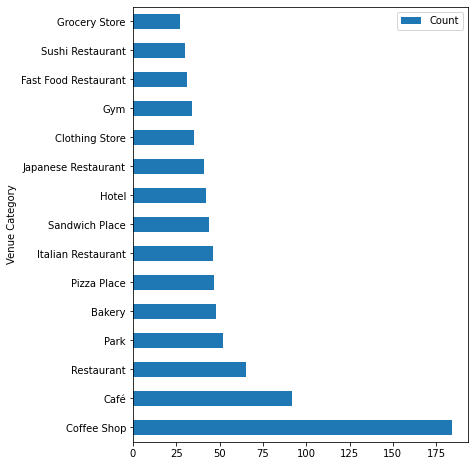

In [10]:
venue_top15.plot(kind = 'barh', figsize = (6, 8))

## ANALYSING EACH NEIGHBORHOOD

In [11]:
onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")
cols = list(onehot.columns)
onehot['Neighborhood'] = nearby_venues['Neighborhood']
idx = cols.index('Neighborhood')
del cols[idx]
cols.insert(0, 'Neighborhood')
onehot = onehot[cols]
onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Converting each occurence into the mean of each occurence in that particular neighborhood
grouped_nh = onehot.groupby('Neighborhood').mean().reset_index()
grouped_nh.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## FINDING THE 10 MOST COMMON VENUES PER NEIGHBORHOOD

In [13]:
most_common = pd.DataFrame(columns = ['Neighborhood'] + [str(i) for i in range(1, 11)])

In [14]:
for j, nh in enumerate(grouped_nh['Neighborhood']):
    
    l = []
    for i, col in enumerate(grouped_nh.columns.to_list()):
        if(i == 0):
            continue

        l.append((col, grouped_nh.iloc[j, i]))
        
    a = sorted(l, key = lambda x:x[1], reverse = True)[:10]
    names = [x for (x, y) in a]
    values = {}
    values["Neighborhood"] = nh
    for k in range(1, 11):
        values[str(k)] = names[k - 1]
    most_common = most_common.append(values, ignore_index = True)

In [15]:
most_common

,Neighborhood,1,2,3,4,5,6,7,8,9,10
0,Agincourt,Breakfast Spot,Latin American Restaurant,Lounge,Skating Rink,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
1,"Alderwood, Long Branch",Pizza Place,Athletics & Sports,Coffee Shop,Gym,Pub,Sandwich Place,Accessories Store,Airport,Airport Food Court,Airport Gate
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Bridal Shop,Deli / Bodega,Diner,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Ice Cream Shop,Intersection
3,Bayview Village,Bank,Café,Chinese Restaurant,Japanese Restaurant,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Sandwich Place,American Restaurant,Butcher,Café,Comfort Food Restaurant,Fast Food Restaurant,Greek Restaurant,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",Butcher,Coffee Shop,Grocery Store,Pharmacy,Pizza Place,Supermarket,Accessories Store,Airport,Airport Food Court,Airport Gate
92,Woburn,Coffee Shop,Indian Restaurant,Korean BBQ Restaurant,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal
93,Woodbine Heights,Athletics & Sports,Beer Store,Bus Stop,Curling Ice,Intersection,Park,Skating Rink,Accessories Store,Airport,Airport Food Court
94,York Mills West,Convenience Store,Park,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant


## CLUSTERING EACH NEIGHBORHOOD

In [16]:
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, n_init = 12)
X = grouped_nh.drop(['Neighborhood'], axis = 1)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=12)

In [17]:
most_common.insert(0, 'Cluster Label', kmeans.labels_)
most_common

,Cluster Label,Neighborhood,1,2,3,4,5,6,7,8,9,10
0,0,Agincourt,Breakfast Spot,Latin American Restaurant,Lounge,Skating Rink,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
1,0,"Alderwood, Long Branch",Pizza Place,Athletics & Sports,Coffee Shop,Gym,Pub,Sandwich Place,Accessories Store,Airport,Airport Food Court,Airport Gate
2,0,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Bridal Shop,Deli / Bodega,Diner,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Ice Cream Shop,Intersection
3,0,Bayview Village,Bank,Café,Chinese Restaurant,Japanese Restaurant,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
4,0,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Sandwich Place,American Restaurant,Butcher,Café,Comfort Food Restaurant,Fast Food Restaurant,Greek Restaurant,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,"Willowdale, Willowdale West",Butcher,Coffee Shop,Grocery Store,Pharmacy,Pizza Place,Supermarket,Accessories Store,Airport,Airport Food Court,Airport Gate
92,0,Woburn,Coffee Shop,Indian Restaurant,Korean BBQ Restaurant,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal
93,0,Woodbine Heights,Athletics & Sports,Beer Store,Bus Stop,Curling Ice,Intersection,Park,Skating Rink,Accessories Store,Airport,Airport Food Court
94,1,York Mills West,Convenience Store,Park,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant


In [18]:
lat = []
long = []

for nh in most_common['Neighborhood']:
    
    temp = nearby_venues[nearby_venues['Neighborhood'] == nh].reset_index()
    lat.append(temp.loc[0, 'Neighborhood Latitude'])
    long.append(temp.loc[0, 'Neighborhood Longitude'])
    

most_common.insert(2, 'Latitude', lat)
most_common.insert(3, 'Longitude', long)

In [19]:
most_common

,Cluster Label,Neighborhood,Latitude,Longitude,1,2,3,4,5,6,7,8,9,10
0,0,Agincourt,43.794200,-79.262029,Breakfast Spot,Latin American Restaurant,Lounge,Skating Rink,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
1,0,"Alderwood, Long Branch",43.602414,-79.543484,Pizza Place,Athletics & Sports,Coffee Shop,Gym,Pub,Sandwich Place,Accessories Store,Airport,Airport Food Court,Airport Gate
2,0,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Bank,Coffee Shop,Bridal Shop,Deli / Bodega,Diner,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Ice Cream Shop,Intersection
3,0,Bayview Village,43.786947,-79.385975,Bank,Café,Chinese Restaurant,Japanese Restaurant,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
4,0,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,Coffee Shop,Italian Restaurant,Sandwich Place,American Restaurant,Butcher,Café,Comfort Food Restaurant,Fast Food Restaurant,Greek Restaurant,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,"Willowdale, Willowdale West",43.782736,-79.442259,Butcher,Coffee Shop,Grocery Store,Pharmacy,Pizza Place,Supermarket,Accessories Store,Airport,Airport Food Court,Airport Gate
92,0,Woburn,43.770992,-79.216917,Coffee Shop,Indian Restaurant,Korean BBQ Restaurant,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal
93,0,Woodbine Heights,43.695344,-79.318389,Athletics & Sports,Beer Store,Bus Stop,Curling Ice,Intersection,Park,Skating Rink,Accessories Store,Airport,Airport Food Court
94,1,York Mills West,43.752758,-79.400049,Convenience Store,Park,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant


In [20]:
map_clusters = folium.Map(location=toronto_coords, zoom_start=11)

x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []

for lat, lon, poi, cluster in zip(most_common['Latitude'], most_common['Longitude'], most_common['Neighborhood'], most_common['Cluster Label']):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## EXAMINING THE CLUSTERS

In [21]:
most_common.loc[most_common['Cluster Label'] == 0, most_common.columns[[1] + list(range(5, most_common.shape[1]))]]

,Neighborhood,2,3,4,5,6,7,8,9,10
0,Agincourt,Latin American Restaurant,Lounge,Skating Rink,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
1,"Alderwood, Long Branch",Athletics & Sports,Coffee Shop,Gym,Pub,Sandwich Place,Accessories Store,Airport,Airport Food Court,Airport Gate
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bridal Shop,Deli / Bodega,Diner,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Ice Cream Shop,Intersection
3,Bayview Village,Café,Chinese Restaurant,Japanese Restaurant,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sandwich Place,American Restaurant,Butcher,Café,Comfort Food Restaurant,Fast Food Restaurant,Greek Restaurant,Grocery Store
...,...,...,...,...,...,...,...,...,...,...
90,"Willowdale, Willowdale East",Café,Coffee Shop,Pizza Place,Sandwich Place,Arts & Crafts Store,Bank,Bubble Tea Shop,Discount Store,Electronics Store
91,"Willowdale, Willowdale West",Coffee Shop,Grocery Store,Pharmacy,Pizza Place,Supermarket,Accessories Store,Airport,Airport Food Court,Airport Gate
92,Woburn,Indian Restaurant,Korean BBQ Restaurant,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal
93,Woodbine Heights,Beer Store,Bus Stop,Curling Ice,Intersection,Park,Skating Rink,Accessories Store,Airport,Airport Food Court


In [22]:
most_common.loc[most_common['Cluster Label'] == 1, most_common.columns[[1] + list(range(5, most_common.shape[1]))]]

,Neighborhood,2,3,4,5,6,7,8,9,10
10,Caledonia-Fairbanks,Pool,Women's Store,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal
26,"East Toronto, Broadview North (Old East York)",Park,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant
30,"Forest Hill North & West, Forest Hill Road Park",Park,Sushi Restaurant,Trail,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
44,"Kingsview Village, St. Phillips, Martin Grove ...",Mobile Phone Shop,Park,Sandwich Place,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
46,Lawrence Park,Park,Swim School,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal
50,"Milliken, Agincourt North, Steeles East, L'Amo...",Park,Playground,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal
54,"North Park, Maple Leaf Park, Upwood Park",Basketball Court,Construction & Landscaping,Park,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service
61,Parkwoods,Park,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant
65,Rosedale,Playground,Trail,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal
88,Weston,Convenience Store,Jewelry Store,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal


In [23]:
most_common.loc[most_common['Cluster Label'] == 2, most_common.columns[[1] + list(range(5, most_common.shape[1]))]]

,Neighborhood,2,3,4,5,6,7,8,9,10
66,Roselawn,Home Service,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant
67,"Rouge Hill, Port Union, Highland Creek",Home Service,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant


In [24]:
most_common.loc[most_common['Cluster Label'] == 3, most_common.columns[[1] + list(range(5, most_common.shape[1]))]]

,Neighborhood,2,3,4,5,6,7,8,9,10
49,"Malvern, Rouge",Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop
